Main source: https://blog.paperspace.com/implementing-gans-in-tensorflow/

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [175]:
tf.reset_default_graph()

batch_size = 256
nd_steps = 10
ng_steps = 10

X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

In [176]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def plot_dist(data):
    plt.scatter(*zip(*data))
    plt.show()

def get_y(x, mode):
    if mode == "quadratic":
        return 10 + x*x
    if mode == "sin":
        return 10 + np.sin(x)

def sample_data(n=10000, scale=100, mode = "quadratic"):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i], mode)
        data.append([x[i], yi])

    return np.array(data)

def generator(Z,hsize=[300, 300],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out_part = tf.layers.dense(h2,2)

    return out_part

def discriminator(X,hsize=[300, 300],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out_part = tf.layers.dense(h3,1)

    return out_part, h3

In [177]:
G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

In [178]:
#disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
#gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))
disc_loss = tf.reduce_mean(f_logits) - tf.reduce_mean(r_logits)
gen_loss = -tf.reduce_mean(f_logits)

scale = 0.9
epsilon = tf.random_uniform([], 0.0, 1.0)
x_hat = epsilon * X + (1 - epsilon) *G_sample
d_hat = discriminator(x_hat, reuse = True)

ddx = tf.gradients(d_hat, x_hat)[0]
ddx = tf.sqrt(tf.reduce_sum(tf.square(ddx), axis=1))
ddx = tf.reduce_mean(tf.square(ddx - 1.0) * scale)

disc_loss += ddx

In [179]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step

Iterations: 0	 Discriminator loss: -11.6977	 Generator loss: -0.0331
Iterations: 1000	 Discriminator loss: 25.4596	 Generator loss: -2082.7129
Iterations: 2000	 Discriminator loss: -137.7386	 Generator loss: -889.5665
Iterations: 3000	 Discriminator loss: -811.5773	 Generator loss: 1220.5859
Iterations: 4000	 Discriminator loss: -3343.8643	 Generator loss: -50804.2070
Iterations: 5000	 Discriminator loss: 691.3851	 Generator loss: 3358.8145
Iterations: 6000	 Discriminator loss: -1031.6541	 Generator loss: 8558.3457
Iterations: 7000	 Discriminator loss: 671.1242	 Generator loss: 31959.6367
Iterations: 8000	 Discriminator loss: -3657.3828	 Generator loss: -80150.9688
Iterations: 9000	 Discriminator loss: -149.4520	 Generator loss: -66783.7734
Iterations: 10000	 Discriminator loss: 1367.1718	 Generator loss: -23741.5000
Iterations: 11000	 Discriminator loss: 3957.6987	 Generator loss: 18612.4609
Iterations: 12000	 Discriminator loss: 714.5751	 Generator loss: -23151.2891
Iterations: 13000

C:\Users\AurelProsz\Anaconda3\envs\keras2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Iterations: 101000	 Discriminator loss: 300390.3125	 Generator loss: -788139.8750
Iterations: 102000	 Discriminator loss: -5651.6665	 Generator loss: -51579.7109
Iterations: 103000	 Discriminator loss: -1932.0311	 Generator loss: -201119.5312
Iterations: 104000	 Discriminator loss: -3204.4954	 Generator loss: 166398.3750
Iterations: 105000	 Discriminator loss: 1334.7273	 Generator loss: 161932.0000
Iterations: 106000	 Discriminator loss: 11356.7461	 Generator loss: -24260.8984
Iterations: 107000	 Discriminator loss: 13941.4062	 Generator loss: -166532.4375
Iterations: 108000	 Discriminator loss: 33556.6211	 Generator loss: -101943.0781
Iterations: 109000	 Discriminator loss: 37836.0664	 Generator loss: -365008.8125
Iterations: 110000	 Discriminator loss: -61160.6328	 Generator loss: 447115.6250
Iterations: 111000	 Discriminator loss: -3079.7673	 Generator loss: -203743.2188
Iterations: 112000	 Discriminator loss: -9772.4570	 Generator loss: 151458.0781
Iterations: 113000	 Discriminator

KeyboardInterrupt: 

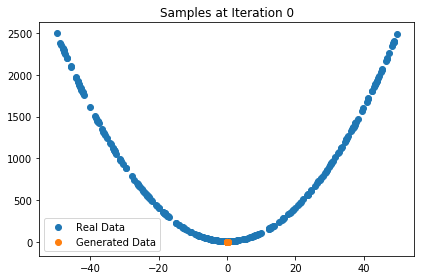

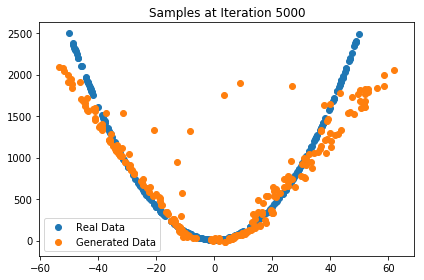

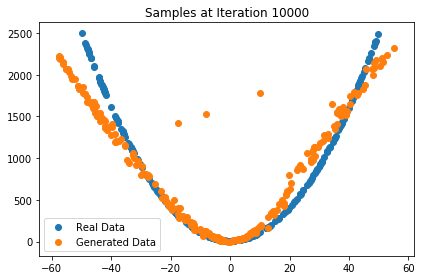

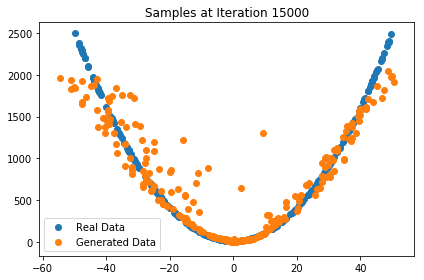

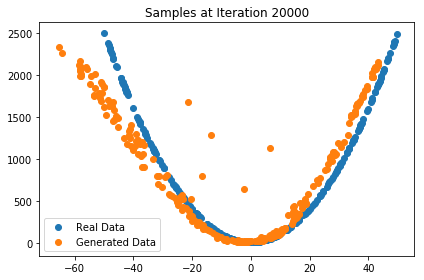

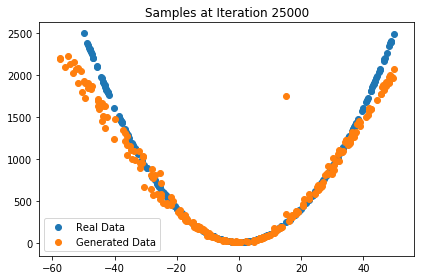

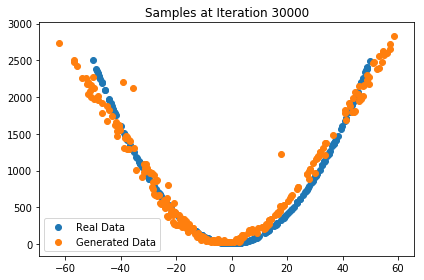

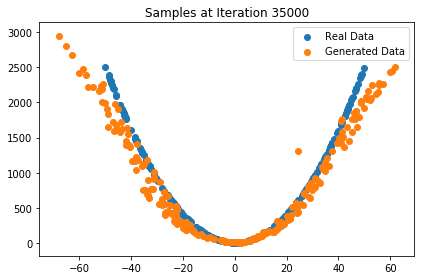

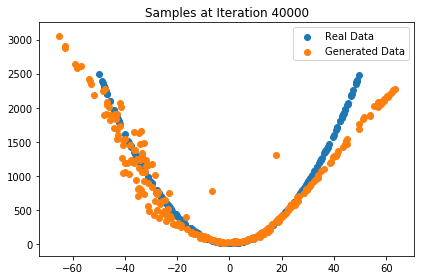

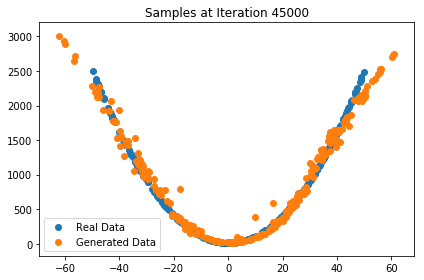

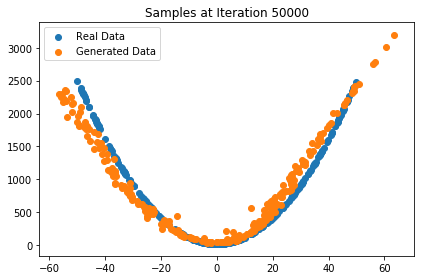

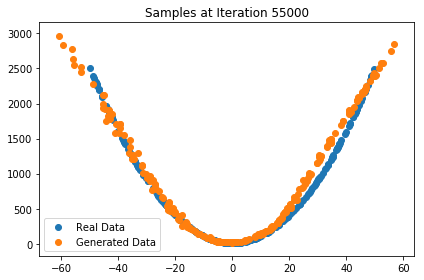

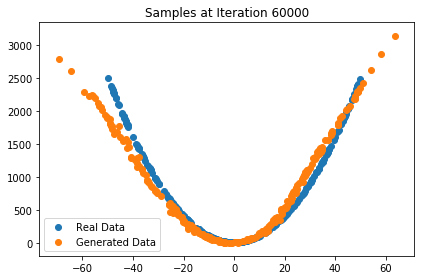

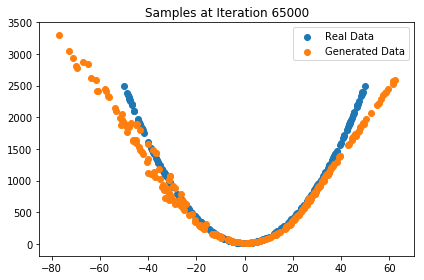

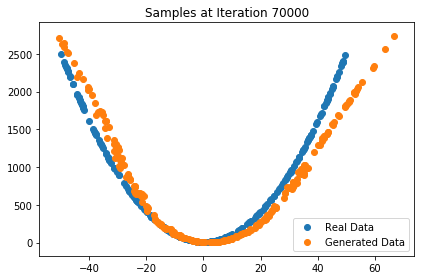

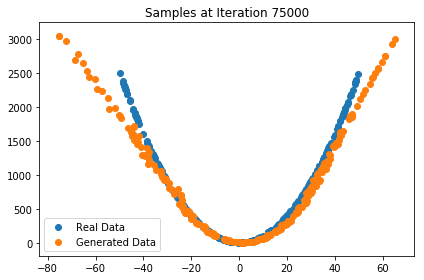

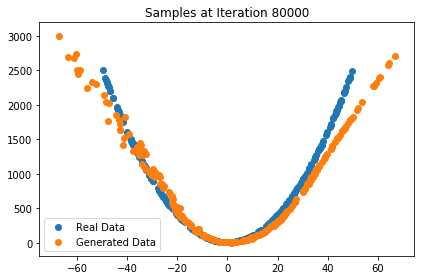

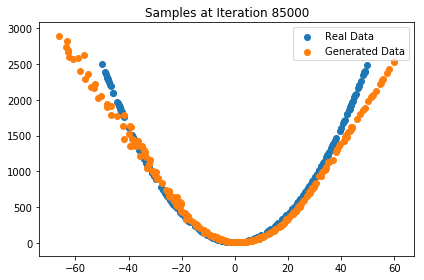

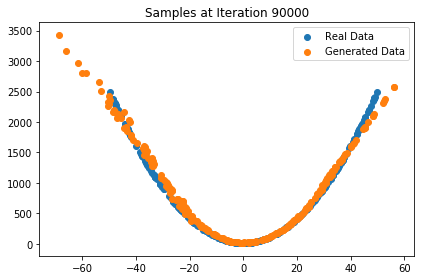

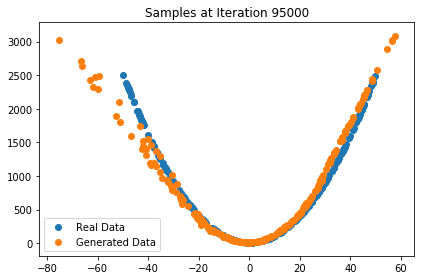

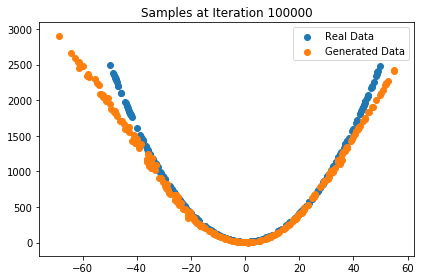

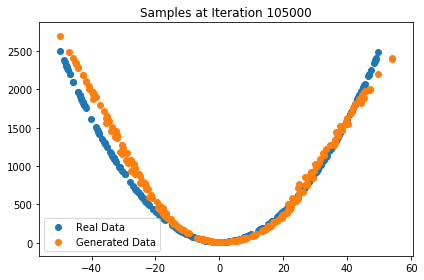

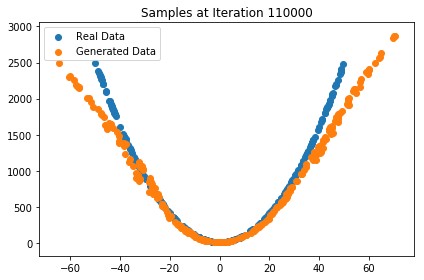

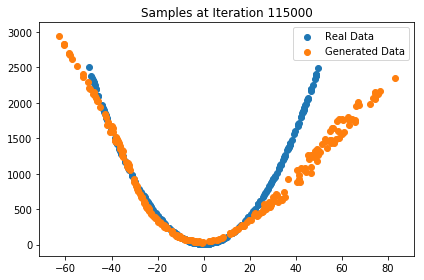

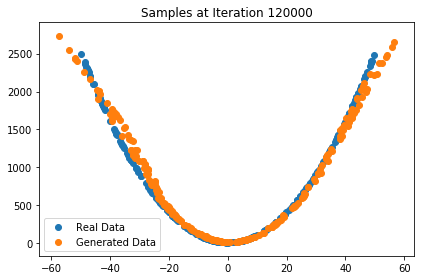

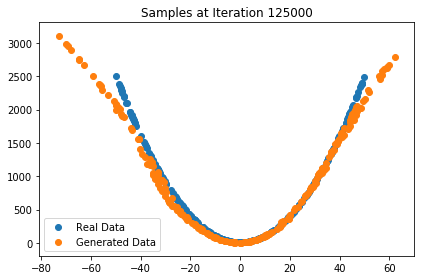

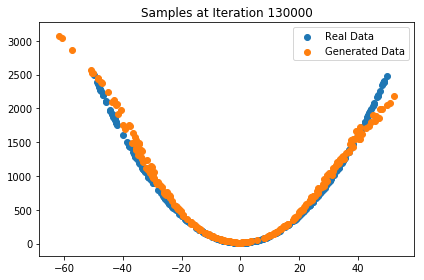

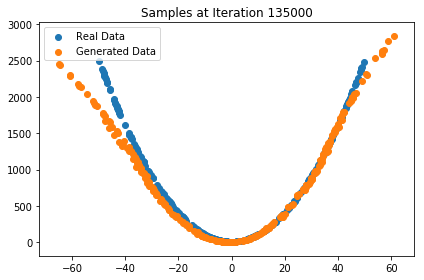

In [180]:
mode = "quadratic"
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)
x_plot = sample_data(n=batch_size, mode = mode)

dloss_list = []
gloss_list = []
for i in range(100000):
    X_batch = sample_data(n=batch_size, mode = mode)
    Z_batch = sample_Z(batch_size, 2)
    _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})
    if (i % 1000 == 0):
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
        dloss_list.append(dloss)
        gloss_list.append(gloss)
    if (i % 5000 == 0):  
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        #plt.savefig('../plots/iterations/iteration_%d.png'%i)
        #plt.close()

C:\Users\AurelProsz\Anaconda3\envs\keras2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\AurelProsz\Anaconda3\envs\keras2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


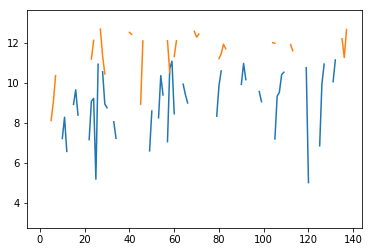

In [181]:
plt.plot(list(range(len(dloss_list))), np.log(dloss_list))
plt.plot(list(range(len(gloss_list))), np.log(gloss_list))

plt.show()


In [ ]:
sampled_quad = sample_data(n = 10000, scale = 100)
sampled_sin = sample_data(n = 10000, scale = 100, mode = "sin")


In [ ]:
plot_dist(sampled_quad)
plot_dist(sampled_sin)

In [ ]:
list(range(10))

# MNIST
https://towardsdatascience.com/implementing-a-generative-adversarial-network-gan-dcgan-to-draw-human-faces-8291616904a

In [183]:
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [190]:
tf.reset_default_graph()
batch_size = 64
n_noise = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
noise = tf.placeholder(dtype=tf.float32, shape=[None, n_noise])

keep_prob = tf.placeholder(dtype=tf.float32, name='keep_prob')
is_training = tf.placeholder(dtype=tf.bool, name='is_training')


In [191]:
def montage(images):
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    m = np.ones((images.shape[1] * n_plots + n_plots + 1, images.shape[2] * n_plots + n_plots + 1)) * 0.5
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                m[1 + i + i * img_h:1 + i + (i + 1) * img_h,
                  1 + j + j * img_w:1 + j + (j + 1) * img_w] = this_img
    return m

def lrelu(x):
    return tf.maximum(x, tf.multiply(x, 0.2))

def binary_cross_entropy(x, z):
    eps = 1e-12
    return (-(x * tf.log(z + eps) + (1. - x) * tf.log(1. - z + eps)))

def discriminator(img_in, reuse=None, keep_prob=keep_prob):
    activation = lrelu
    with tf.variable_scope("discriminator", reuse=reuse):
        x = tf.reshape(img_in, shape=[-1, 28, 28, 1])
        x = tf.layers.conv2d(x, kernel_size=5, filters=64, strides=2, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, kernel_size=5, filters=64, strides=1, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, kernel_size=5, filters=64, strides=1, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=128, activation=activation)
        x = tf.layers.dense(x, units=1, activation=tf.nn.sigmoid)
        return x
    
def generator(z, keep_prob=keep_prob, is_training=is_training):
    activation = lrelu
    momentum = 0.99
    with tf.variable_scope("generator", reuse=None):
        x = z
        d1 = 4
        d2 = 1
        x = tf.layers.dense(x, units=d1 * d1 * d2, activation=activation)
        x = tf.layers.dropout(x, keep_prob)      
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)  
        x = tf.reshape(x, shape=[-1, d1, d1, d2])
        x = tf.image.resize_images(x, size=[7, 7])
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=64, strides=2, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=64, strides=2, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=64, strides=1, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=1, strides=1, padding='same', activation=tf.nn.sigmoid)
        return x

In [192]:
g = generator(noise, keep_prob, is_training)
d_real = discriminator(X_in)
d_fake = discriminator(g, reuse=True)

vars_g = [var for var in tf.trainable_variables() if var.name.startswith("generator")]
vars_d = [var for var in tf.trainable_variables() if var.name.startswith("discriminator")]


d_reg = tf.contrib.layers.apply_regularization(tf.contrib.layers.l2_regularizer(1e-6), vars_d)
g_reg = tf.contrib.layers.apply_regularization(tf.contrib.layers.l2_regularizer(1e-6), vars_g)

loss_d_real = binary_cross_entropy(tf.ones_like(d_real), d_real)
loss_d_fake = binary_cross_entropy(tf.zeros_like(d_fake), d_fake)
loss_g = tf.reduce_mean(binary_cross_entropy(tf.ones_like(d_fake), d_fake))
loss_d = tf.reduce_mean(0.5 * (loss_d_real + loss_d_fake))

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer_d = tf.train.RMSPropOptimizer(learning_rate=0.00015).minimize(loss_d + d_reg, var_list=vars_d)
    optimizer_g = tf.train.RMSPropOptimizer(learning_rate=0.00015).minimize(loss_g + g_reg, var_list=vars_g)
    
    
sess = tf.Session()
sess.run(tf.global_variables_initializer())

0 0.69675606 0.6923754 0.69950384 0.6940083


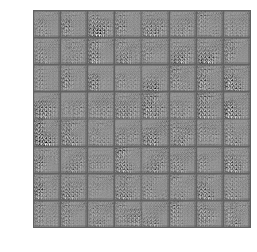

50 0.67802024 0.7365409 0.7044084 0.6516321


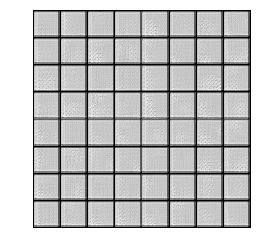

100 0.5603163 1.1068404 0.7163919 0.40424082


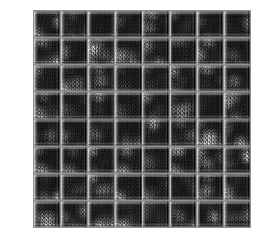

150 0.48792928 1.0972924 0.5444194 0.4314392
not training discriminator


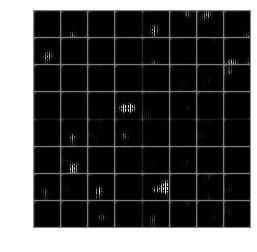

200 0.49331212 1.20266 0.6026502 0.38397402
not training discriminator


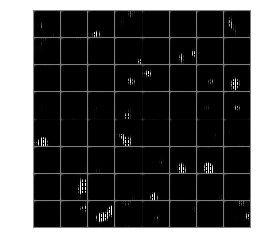

250 0.5531971 1.2166901 0.7076124 0.3987819
not training discriminator


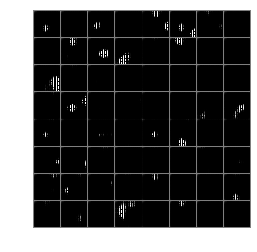

300 0.6515411 1.3464389 0.9223637 0.38071865
not training discriminator


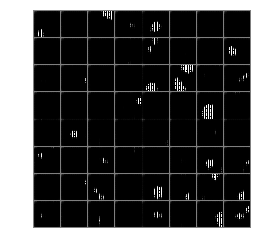

350 0.58910334 1.3606994 0.8069674 0.37123933
not training discriminator


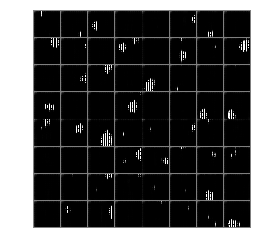

400 0.58303446 1.1688175 0.75479275 0.41127616
not training discriminator


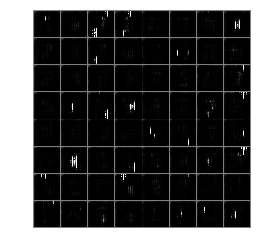

450 0.530112 0.8289112 0.45207754 0.6081466


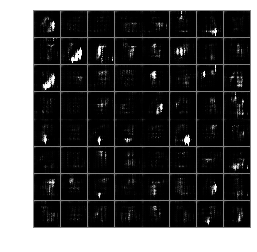

500 0.514081 0.75615716 0.37610304 0.65205896


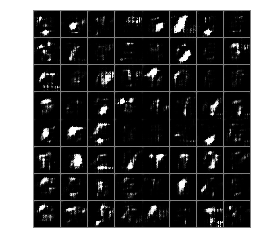

550 0.5471634 1.1920203 0.7027133 0.39161366
not training discriminator


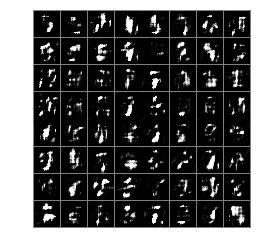

600 0.77298415 1.8923066 1.3746502 0.17131805
not training discriminator


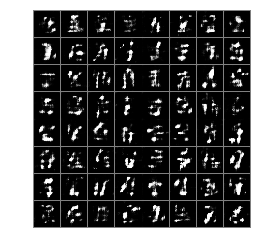

650 0.5750808 1.2568834 0.7959426 0.35421902
not training discriminator


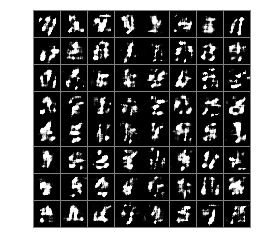

700 0.7321048 1.6022835 1.2319607 0.23224896
not training discriminator


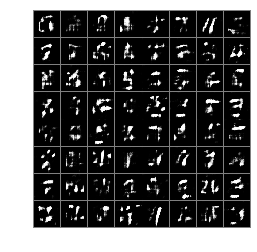

750 0.4862601 0.959285 0.45807302 0.5144471


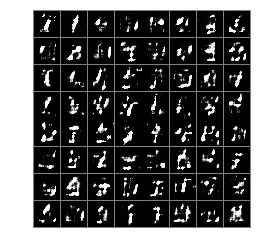

800 0.684682 1.6868539 1.1559752 0.2133888
not training discriminator


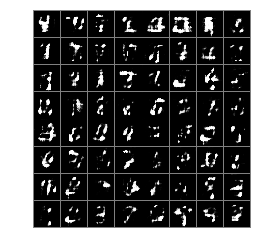

850 0.6857034 1.5216985 1.1126673 0.2587395
not training discriminator


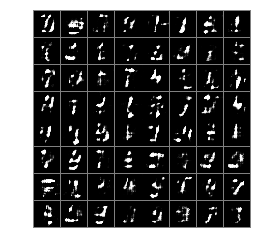

900 0.6106441 1.0899724 0.760435 0.46085328


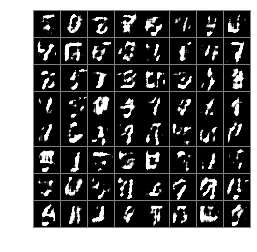

950 0.63618326 1.429122 0.97287023 0.2994963
not training discriminator


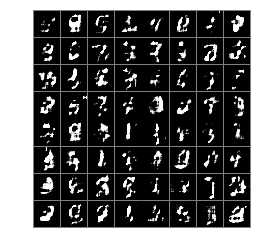

1000 0.5611982 1.3186371 0.78530335 0.33709294
not training discriminator


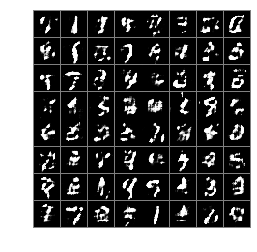

1050 0.6704036 1.4595566 1.0596352 0.28117198
not training discriminator


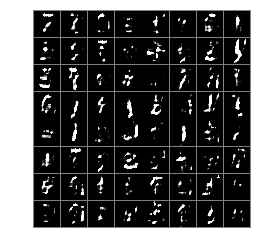

1100 0.65762174 1.4315376 1.0211477 0.2940958
not training discriminator


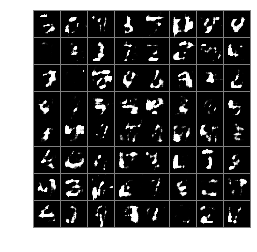

1150 0.5609032 1.2470784 0.75977683 0.36202955
not training discriminator


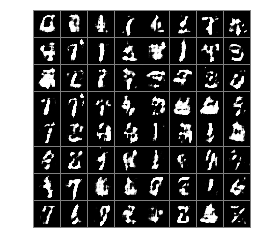

1200 0.5451401 1.2141411 0.6924297 0.39785042
not training discriminator


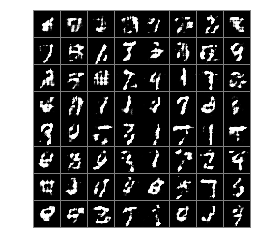

1250 0.61015534 1.2009001 0.8110877 0.4092229


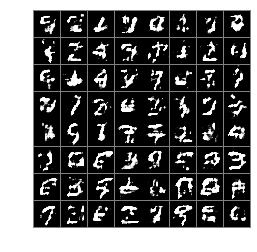

1300 0.6692132 1.585408 1.0886934 0.24973303
not training discriminator


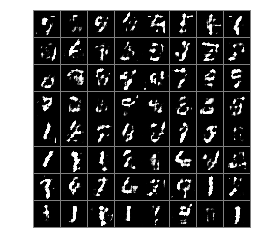

1350 0.53737026 1.3435287 0.74424356 0.33049697
not training discriminator


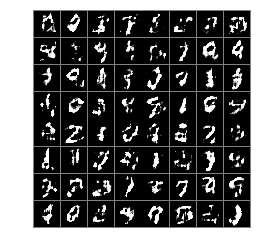

1400 0.5408072 1.3728671 0.7650418 0.31657255
not training discriminator


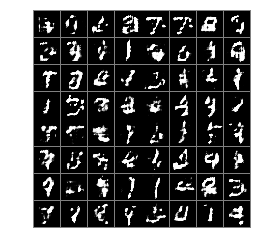

1450 0.5495085 1.1370173 0.67392373 0.4250933
not training discriminator


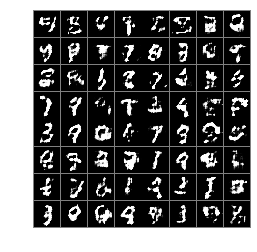

1500 0.6075282 0.5696062 0.27860352 0.93645287


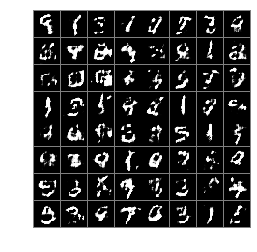

1550 0.59010226 1.3840361 0.85711193 0.32309258
not training discriminator


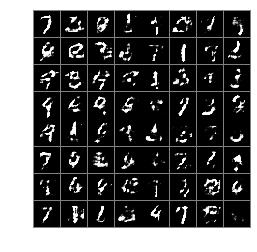

1600 0.55510587 1.2028725 0.71214426 0.39806744
not training discriminator


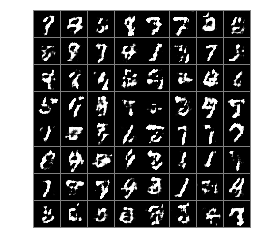

1650 0.5466575 1.2162873 0.7094154 0.38389963
not training discriminator


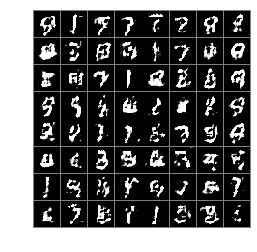

1700 0.5405295 1.1167681 0.6494918 0.4315672
not training discriminator


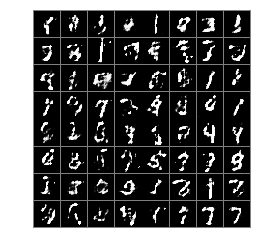

1750 0.61916345 1.3614925 0.9049604 0.3333665
not training discriminator


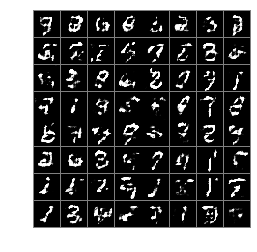

1800 0.59521496 1.2636939 0.8218275 0.36860242
not training discriminator


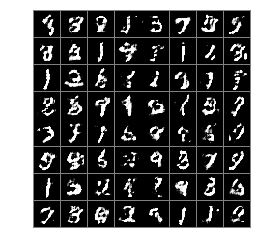

1850 0.5867275 1.2182858 0.78874236 0.38471264
not training discriminator


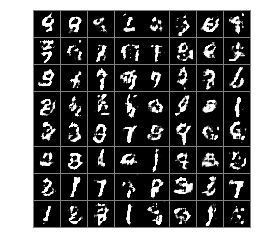

1900 0.5793673 1.2310233 0.77443653 0.384298
not training discriminator


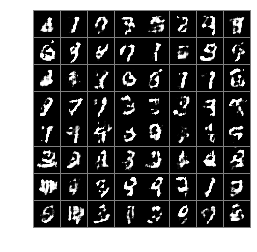

1950 0.50834143 1.2205427 0.607525 0.40915778
not training discriminator


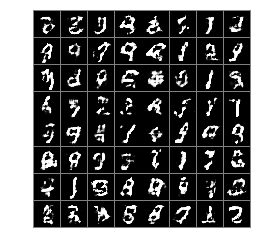

2000 0.60826176 1.2259189 0.8192263 0.3972972
not training discriminator


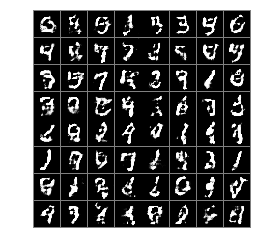

2050 0.5719372 1.3446833 0.80935585 0.33451858
not training discriminator


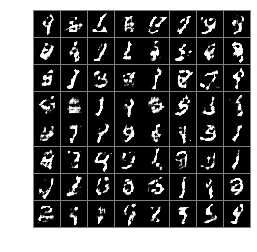

2100 0.4954568 1.2580943 0.63313466 0.35777897
not training discriminator


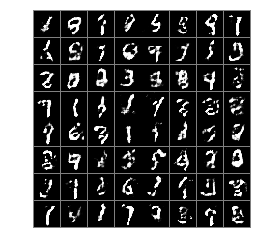

2150 0.6010406 1.2911286 0.850253 0.35182828
not training discriminator


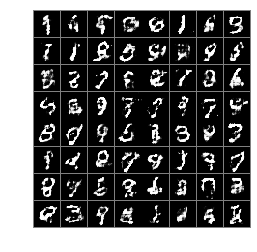

2200 0.566816 1.2294936 0.7622432 0.3713886
not training discriminator


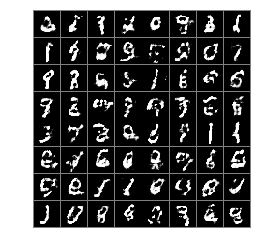

2250 0.73757285 1.7260053 1.2677958 0.2073498
not training discriminator


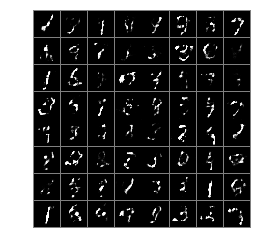

2300 0.713499 1.7459674 1.2093184 0.21767965
not training discriminator


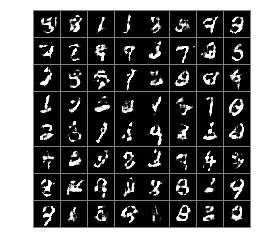

2350 0.5114753 1.1079352 0.5514357 0.47151494
not training discriminator


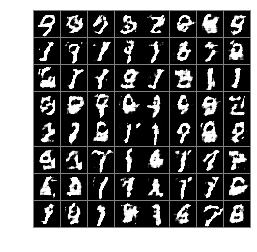

2400 0.5288075 1.4306014 0.7556052 0.30200988
not training discriminator


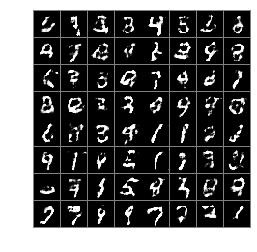

2450 0.4730674 1.1141617 0.49219096 0.45394382
not training discriminator


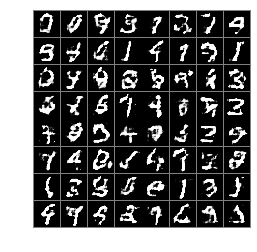

2500 0.5576662 1.1563811 0.67692626 0.43840596
not training discriminator


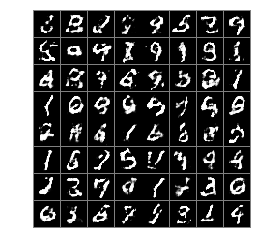

2550 0.6593177 1.3081496 0.9727883 0.34584707


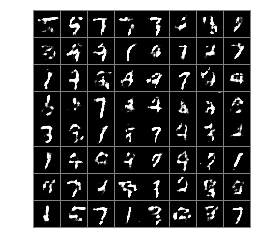

2600 0.6023551 1.1499245 0.7396101 0.46510026


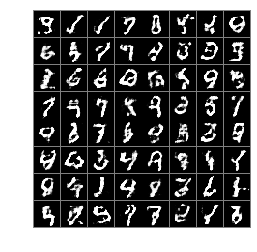

2650 0.62780213 1.427706 0.9334192 0.32218498
not training discriminator


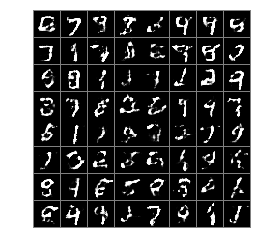

2700 0.58502066 1.4461188 0.8557787 0.31426254
not training discriminator


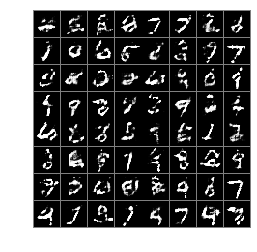

2750 0.5595325 1.3307585 0.7634613 0.35560384
not training discriminator


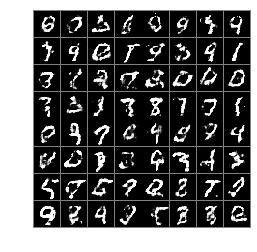

2800 0.62669694 1.3373933 0.8957111 0.35768276
not training discriminator


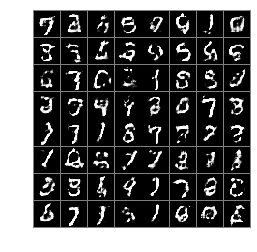

2850 0.5469971 1.3391693 0.75433826 0.33965582
not training discriminator


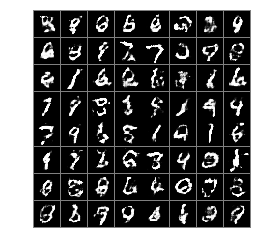

2900 0.6150424 1.283822 0.86751926 0.36256558
not training discriminator


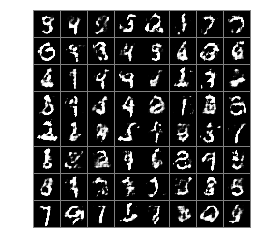

2950 0.61033815 1.3613684 0.89173377 0.32894245
not training discriminator


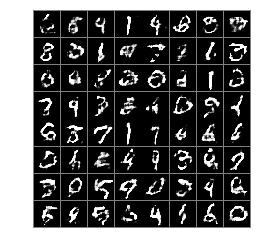

3000 0.5596434 1.044374 0.6447016 0.47458524


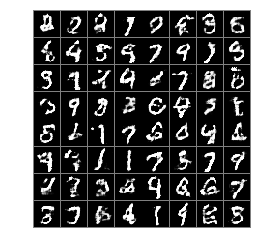

3050 0.5768482 1.1760944 0.73734456 0.4163518
not training discriminator


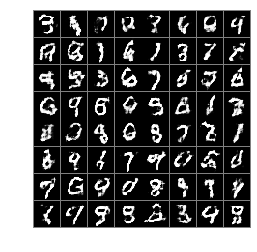

3100 0.6054735 1.2604495 0.848487 0.36246014
not training discriminator


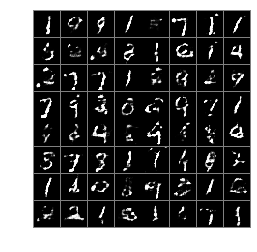

3150 0.62714875 1.442194 0.9514324 0.3028651
not training discriminator


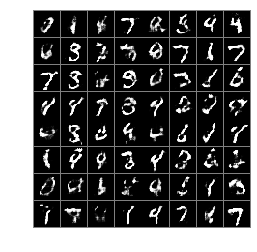

3200 0.63460153 1.4980466 0.9979992 0.27120394
not training discriminator


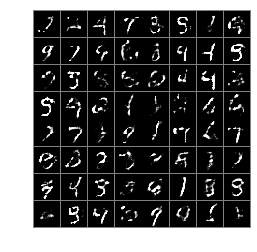

3250 0.724778 1.4212737 1.14946 0.3000961


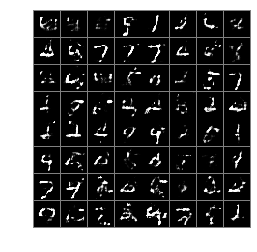

3300 0.5887525 1.4667332 0.8884319 0.28907317
not training discriminator


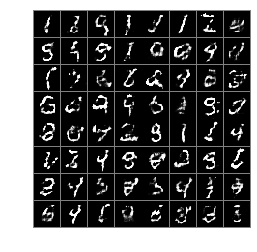

3350 0.5661483 1.2159979 0.72747093 0.40482575
not training discriminator


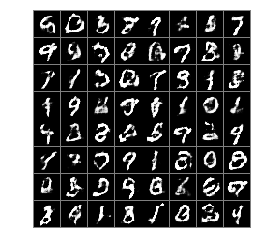

3400 0.4143651 0.8167803 0.17766121 0.65106905


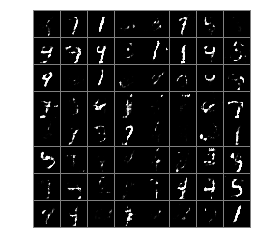

3450 0.6466131 1.4153955 0.9846428 0.3085835
not training discriminator


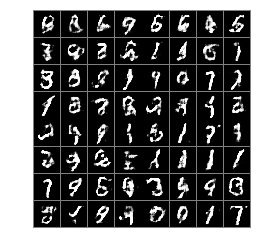

3500 0.5626149 0.7154376 0.3829961 0.7422338


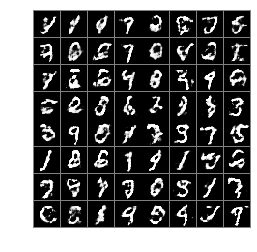

3550 0.6502814 1.3142059 0.95097625 0.34958658
not training discriminator


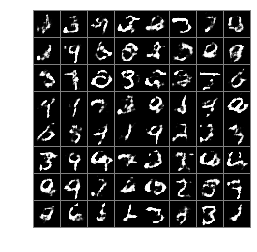

3600 0.4574083 0.72801995 0.18703853 0.7277781


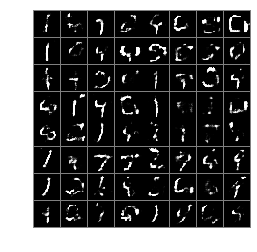

3650 0.7168095 1.7648697 1.2299283 0.20369071
not training discriminator


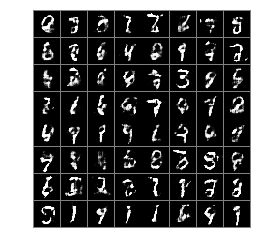

3700 0.6294524 1.4192445 0.95080733 0.30809742
not training discriminator


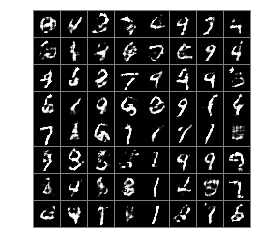

3750 0.6446339 1.2879701 0.9279437 0.36132407


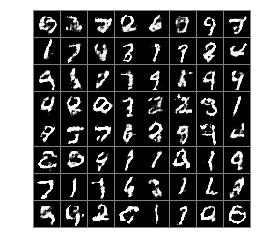

3800 0.58439744 1.4080656 0.8584752 0.31031975
not training discriminator


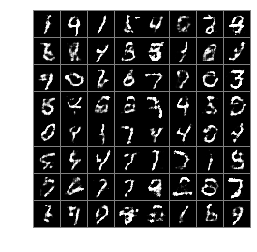

3850 0.6851857 1.3341316 1.0234013 0.34697014


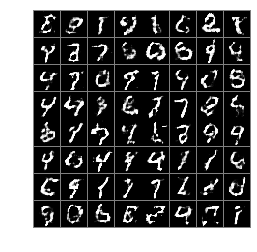

3900 0.49716556 1.0992905 0.5565628 0.43776825
not training discriminator


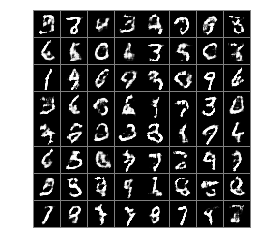

3950 0.6579844 1.4076414 0.9983166 0.31765208
not training discriminator


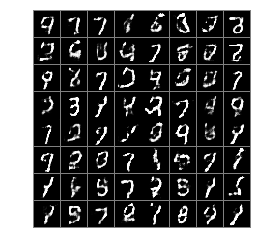

4000 0.6252314 1.5097935 0.9726653 0.27779743
not training discriminator


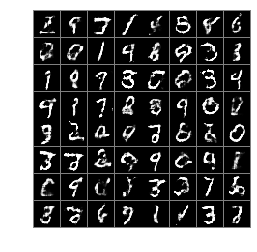

4050 0.63556206 1.4161806 0.9480926 0.32303137
not training discriminator


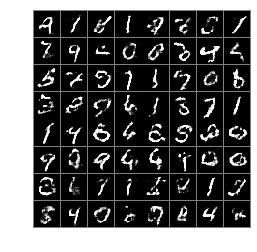

4100 0.6645844 1.6663331 1.1017721 0.22739659
not training discriminator


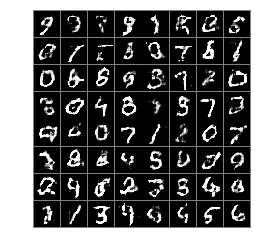

4150 0.7023803 1.5729004 1.1528645 0.2518961
not training discriminator


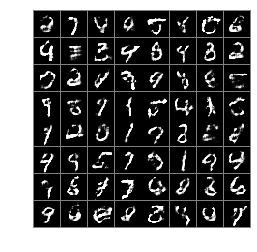

4200 0.67045534 1.4258423 1.0364223 0.30448848
not training discriminator


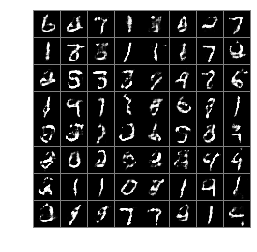

4250 0.64751685 1.4021845 0.97264 0.32239383
not training discriminator


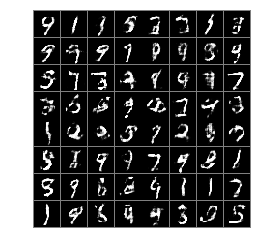

4300 0.65470177 1.293393 0.9537432 0.3556603


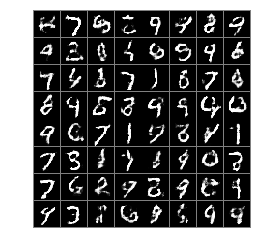

4350 0.6621465 1.5432239 1.0603108 0.26398224
not training discriminator


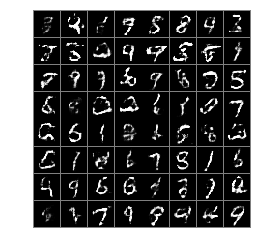

4400 0.6696566 1.5226464 1.0535645 0.28574854
not training discriminator


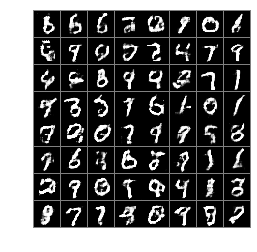

4450 0.71546996 1.4131346 1.126633 0.3043069


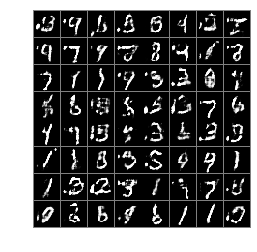

4500 0.6521159 1.3475621 0.9757006 0.32853115
not training discriminator


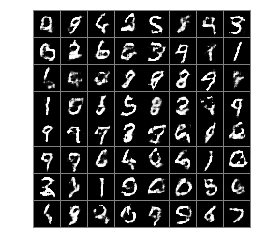

4550 0.5455879 1.2045672 0.70129454 0.38988128
not training discriminator


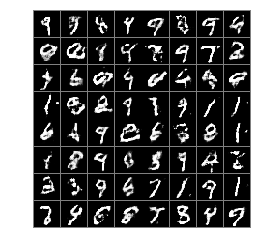

4600 0.517169 1.2515972 0.67297447 0.36136353
not training discriminator


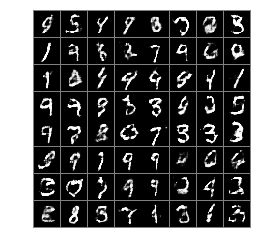

4650 0.56666803 1.1823382 0.74465847 0.38867757
not training discriminator


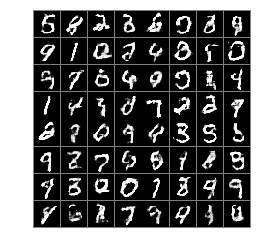

4700 0.48074436 1.1545892 0.5406821 0.4208067
not training discriminator


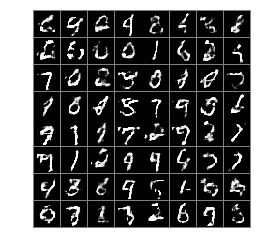

4750 0.7651496 1.6120999 1.281331 0.24896817
not training discriminator


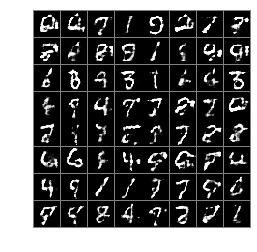

4800 0.66712904 1.4295981 1.0359722 0.29828584
not training discriminator


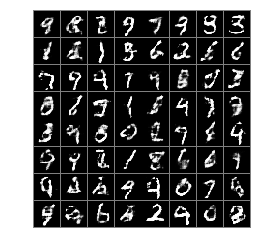

4850 0.6253127 1.3802578 0.92875576 0.32186952
not training discriminator


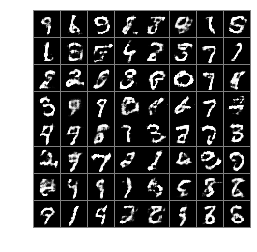

4900 0.6247069 1.3367505 0.8982215 0.3511923
not training discriminator


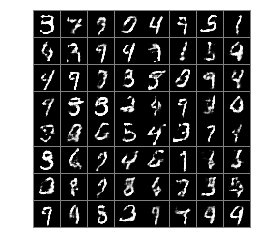

4950 0.6060519 1.348506 0.87529176 0.33681214
not training discriminator


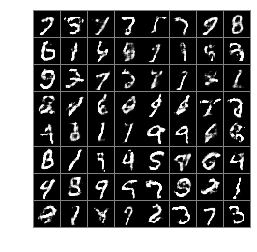

5000 0.57875824 1.1609719 0.74011153 0.41740492
not training discriminator


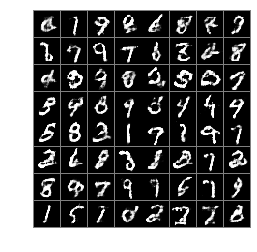

5050 0.68358505 1.3191907 1.0339214 0.33324867


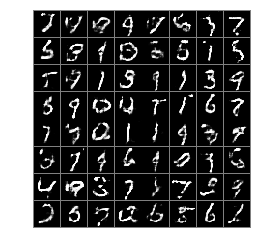

5100 0.6487297 1.4011174 0.99128 0.30617923
not training discriminator


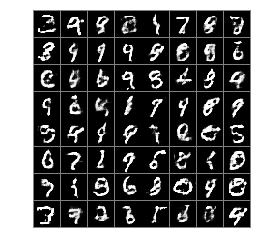

5150 0.5991656 1.2448113 0.82840735 0.3699239
not training discriminator


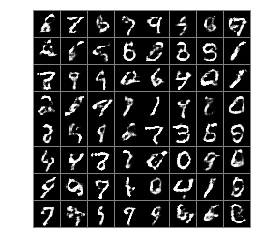

5200 0.6299977 1.5373018 0.99064195 0.26935342
not training discriminator


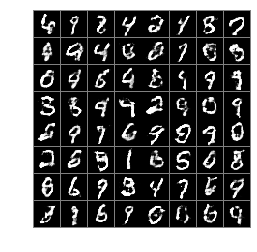

5250 0.53404534 1.2390571 0.68381554 0.38427514
not training discriminator


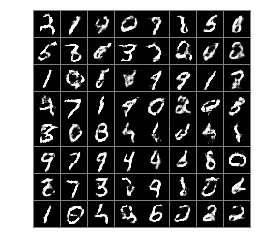

5300 0.60304844 1.2481142 0.82530767 0.38078922
not training discriminator


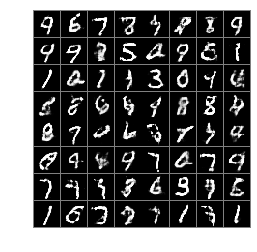

KeyboardInterrupt: 

In [193]:
for i in range(60000):
    train_d = True
    train_g = True
    keep_prob_train = 0.6 # 0.5
    
    
    n = np.random.uniform(0.0, 1.0, [batch_size, n_noise]).astype(np.float32)   
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]  
    
    d_real_ls, d_fake_ls, g_ls, d_ls = sess.run([loss_d_real, loss_d_fake, loss_g, loss_d], feed_dict={X_in: batch, noise: n, keep_prob: keep_prob_train, is_training:True})
    
    d_real_ls = np.mean(d_real_ls)
    d_fake_ls = np.mean(d_fake_ls)
    g_ls = g_ls
    d_ls = d_ls
    
    if g_ls * 1.5 < d_ls:
        train_g = False
        pass
    if d_ls * 2 < g_ls:
        train_d = False
        pass
    
    if train_d:
        sess.run(optimizer_d, feed_dict={noise: n, X_in: batch, keep_prob: keep_prob_train, is_training:True})
        
        
    if train_g:
        sess.run(optimizer_g, feed_dict={noise: n, keep_prob: keep_prob_train, is_training:True})
        
        
    if not i % 50:
        print (i, d_ls, g_ls, d_real_ls, d_fake_ls)
        if not train_g:
            print("not training generator")
        if not train_d:
            print("not training discriminator")
        gen_img = sess.run(g, feed_dict = {noise: n, keep_prob: 1.0, is_training:False})
        imgs = [img[:,:,0] for img in gen_img]
        m = montage(imgs)
        gen_img = m
        plt.axis('off')
        plt.imshow(gen_img, cmap='gray')
        plt.show()